# Intégrale et la méthode des rectangles - correction

Approximation du calcul d'une intégrale par la méthode des rectangles.

In [1]:
%matplotlib inline

## Calcul de l'intégrale

In [2]:
a = -2
b = 3
n = 20

In [3]:
import math

f = lambda x: x * math.cos(x)
f(4)

-2.6145744834544478

In [4]:
def integrale(f, a, b, n):
    somme = 0
    h = float(b - a) / n
    x = a
    for i in range(0, n + 1):
        somme += f(x) * h
        x += h
    return somme


# On vérifie ave un cas simple.
integrale(lambda x: x, 0, 1, 10)

0.55

In [5]:
integrale(f, a, b, n)

-2.2320146802585272

Il faut écrire la fonction qui calcule l'intégrale.

## Calcul de précision

On essaye toutes les valeurs de $n$ jusqu'à obtenir la précision souhaitée en supposant qu'elle est obtenue à partir du moment où la différence relative entre deux valeurs successives est inférieure à la précision.

In [6]:
def integrale_precise(f, a, b, n0, precision):
    val = integrale(f, a, b, n0)
    val0 = None
    while val0 is None or abs(val - val0) / val0 > precision:
        val0 = val
        n0 += 1
        val = integrale(f, a, b, n0)
    return val, n0


integrale_precise(lambda x: x, 0, 1, 10, 1e-4)

(0.5050000000000003, 100)

Le deuxième nombre indique que la valeur de $n$ nécessaire.

In [7]:
integrale_precise(f, a, b, n, 1e-4)

(-2.2196877891927724, 21)

## Calcul plus rapide

Imaginez un piano. A l'itération $n$, on calcule les touches blanches, à l'itération $n+1$, les touches noires. A l'itération $n$, on calcule les $k$ rectangles de hauteur rouges, puis les $k$ verts à $n+1$ puis les $2k$ à $n+2$.

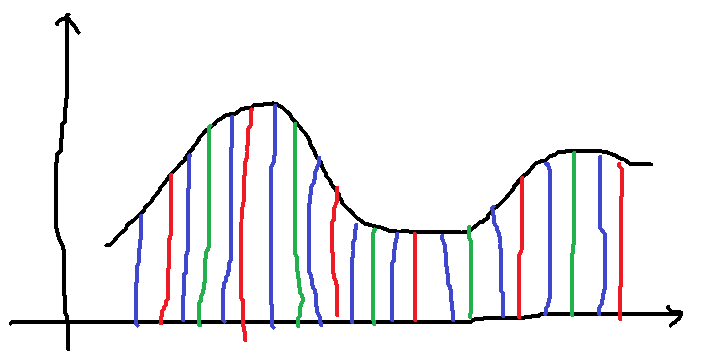

In [9]:
from IPython.display import Image

Image("int2.png", width=400)

In [10]:
def integrale_precise_2n(f, a, b, n0, precision):
    val = integrale(f, a, b, n0)
    val0 = None
    h = float(b - a) / n0
    while val0 is None or abs(val - val0) / val0 > precision:
        val0 = val
        n0 *= 2
        h /= 2
        val = (val + integrale(f, a + h, b, n0)) / 2
    return val, n0


integrale_precise_2n(lambda x: x, 0, 1, 10, 1e-4)

(0.5000454610560389, 81920)

In [11]:
integrale_precise_2n(f, a, b, n, 1e-4)

(-2.2169740198498182, 40)

Qu'est-ce qui explique les différences en précision ? Dans le cas de cette intégrale, on veut calculer $\int_0^1 xdx$. A l'itération $n$, on a : 

$$I(n)=\frac{i}{n}\sum_{i=1}^n \frac{i}{n} = \frac{n(n+1)}{2n^2} = \frac{n+1}{2n} = \frac{1}{2} + \frac{1}{2n}$$

On en déduit que $I(n+1) - I(n) = \frac{1}{2n+2} - \frac{1}{2n} \sim O(\frac{1}{n^2})$. Autrement dit, l'algorithme s'arrête dès que $\frac{1}{n^2} < precision$ mais la somme des différences qui resteraient à calculer si on continuait n'est pas négligeable : 

$$\sum_{i>k} I(n+1) - I(n) \sim \frac{1}{k}$$

Pour cette intégrale, l'algorithme s'arrête alors que le chemin restant à parcourir est aussi grand que la différence entre deux valeurs successives.

La seconde version multiplie le nombre de calculs par deux à chaque fois même si elle évite de recalculer les mêmes valeurs. Une fois qu'on a commencé une série, il faut aller jusqu'au bout. C'est intéressant si la fonction à intégrer est longue à calculer. 

L'intégrale converge pour toute fonction réglée ou si l'ensemble de ses discontinuité est un ensemble de mesure nulle. On peut obtenir une autre propriété si on suppose que la fonction est $C^1$ (la dérivée est continue). La dérivée admet un majorant et on s'en sert pour majorer la marge d'erreur.

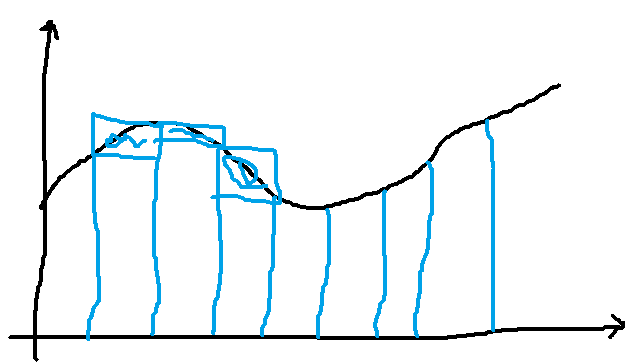

In [13]:
Image("marge.png", width=400)

Chaque petit rectangle est de taille $h=\frac{b-a}{n}$ et de hauteur maximal $M'h$ où $M'$ est un majorant de la dérivée. $M'=\underset{x \in [a,b]}{sup} \left|f'(x)\right|$. La marge d'incertitude vérifie :

$$m(h) \leqslant nM'h^2 = \frac{M'(b-a)^2}{n}$$

C'est une suite décroissante et pour obtenir une précision $p$, il suffit de choisir $n$ tel que :

$$n > \frac{M'(b-a)^2}{p}$$

Il faut maintenant estimer un majorant pour la dérivée. Comme on calcule la fonction pour un ensemble de points pris dans l'interval $x_i=(b-a)\frac{i}{n} + a \in [a,b]$, On peut le faire en calculant :

$$M' \sim \max_i\left\{ \frac{\left|f(x_{i+1}) - f(x_i)\right|}{x_{i+1} - x_i}\right\}$$

Si $f(x)=x^2$, $a=0$, $b=1$, $n = \frac{1}{p}$.

In [14]:
def integrale_precision(f, a, b, n):
    somme = 0
    h = float(b - a) / n
    x = a
    max_fp = 0
    last_f = 0
    for i in range(0, n + 1):
        fx = f(x)
        somme += f(x) * h
        x += h
        if last_f is not None:
            md = abs(fx - last_f) / h
            max_fp = max(max_fp, md)
        last_f = fx
    return somme, max_fp * n * h**2


def integrale_precise_derivee(f, a, b, n0, precision):
    val, prec = integrale_precision(f, a, b, n0)
    val0 = None
    while val0 is None or prec > precision:
        val0 = val
        n0 += 1
        val, prec = integrale_precision(f, a, b, n0)
    return val, n0


integrale_precise_derivee(lambda x: x, 0, 1, 10, 1e-3)

(0.5004995004994989, 1001)

## La fonction récalcitrante

L'intégrale de Rienmann converge pour toute fonction dont les discontinuités sont de mesures nulles. Numériquement, c'est autre chose. On peut construire une telle fonction pour laquelle le calcule de l'intégrale ne converge pas.

$$f(x) = \left\{ \begin{array}{ll}2 \text{ si } x = k2^{-n} \forall k,n \in \mathbb{N} \\ 1 \text{ sinon } \end{array}\right.$$

In [15]:
import math


def bizarre(x, n):
    if x == 0:
        return 1
    kn = int(math.log(n) / math.log(2)) + 1
    a = 2**kn * x
    d = abs(int(a + 1e-10) - a)
    if d < 1e-10:
        return 2
    else:
        return 1


bizarre(0.33, 8), bizarre(0.5, 8), bizarre(0.125, 8)

(1, 2, 2)

In [16]:
def integrale_bizarre(f, a, b, n):
    somme = 0
    h = float(b - a) / n
    x = a
    for i in range(0, n + 1):
        # même fonction mais on passe n également
        somme += f(x, n) * h
        x += h
    return somme


px = list(range(1, 257))
py = [integrale_bizarre(bizarre, 0, 1, i) for i in px]

In [17]:
integrale_bizarre(bizarre, 0, 1, 8)

2.125

In [18]:
integrale_bizarre(bizarre, 0, 1, 16)

2.0625

In [19]:
integrale_bizarre(bizarre, 0, 1, 7)

1.2857142857142856

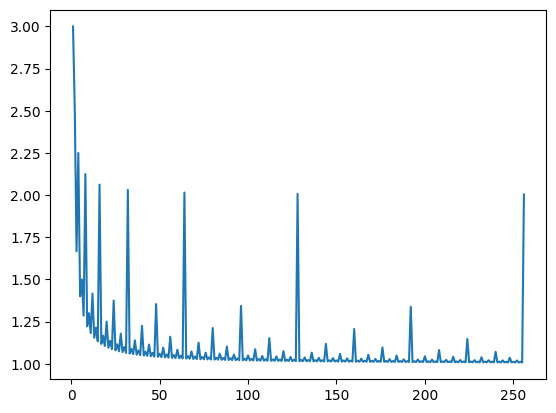

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(px, py);

La fonction est bornée, intégrable car elle est constante partout sauf sur un ensemble de mesure nulle qui est plus petit que l'ensemble des rationnels. Pourtant le calcul informatique associée ne converge pas car pour certaines valeurs de $n$, les valeurs prises tombent pour la plupart dans cet ensemble.

## Calcul de Monte Carlo

Ce calcul consiste simplement à tirer des valeurs aléatoirement dans l'intervalle à intégrer puis à en faire la moyenne.

In [21]:
import random


def integrale_mc(f, a, b, n):
    somme = 0
    for i in range(0, n):
        x = random.uniform(a, b)
        somme += f(x)
    return somme / n


# On vérifie ave un cas simple.
integrale_mc(lambda x: x, 0, 1, 100)

0.5443922662659958

On peut appeler plusieurs fois la fonction et faire la moyenne des valeurs obtenues pour obtenir un algorithme qui s'arrête à partir d'une certaine précision.

In [22]:
def integrale_mc_precise(f, a, b, n0, precision):
    val = integrale(f, a, b, n0)
    moy = val
    moy0 = None
    nb = 1
    while moy0 is None or abs(moy - moy0) / moy0 > precision:
        val += integrale_mc(f, a, b, n0)
        nb += 1
        moy0 = moy
        moy = val / nb
    return moy, n0


integrale_mc_precise(lambda x: x, 0, 1, 100, 1e-4)

(0.5001005538840249, 100)

## Quand s'arrêter ?

L'intégrale de [Monte Carlo](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo) est une variable aléatoire qui est une moyenne. $I_n(f)=\frac{1}{n} \sum_{i=1}^n f((b-a)U_i + b)$ où $U_i$ est une variable aléatoire uniforme dans l'intervalle $[0,1]$. $f((b-a)U_i + b)$ est une variable aléatoire qui n'est a priori pas uniforme. Elle est bornée si fonction $f$ est bornée. En utilisant le théorème centrale limite, on sait que $\sqrt{n}I_n(f)$ tend vers une loi normale dont on peut majorer la variance par $M^2$ où $M=max(\{f(x) | x \in [a,b]\})$. Il suffit ensuite de choisir un $n$ suffisant grand telle sorte que l'intervalle de confiance à 95% soit suffisamment petit. Si $p$ est la précision, $\frac{1.96 M}{\sqrt{n}} < \frac{p}{2}$ et donc $n > \frac{16M^2}{p^2}$.

Pour une précision à $10^{-2}$ :

In [ ]:
integrale_mc(lambda x: x, 0, 1, int(16e4))

0.500765653300686

## Mesure du temps

Les temps ne sont pas vraiment comparables puisque les conditions d'arrêt de chaque fonction ne correspondent pas aux même précisions.

In [23]:
%timeit integrale_precise(f, a, b, n, 1e-4)

14.4 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
%timeit integrale_precise_2n(f, a, b, n, 1e-4)

14 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
%timeit integrale_mc_precise(f, a, b, n, 1e-4)

18.3 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [26]:
%timeit integrale_precise(lambda x: x, 0, 1, 10, 1e-4)

885 µs ± 156 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
%timeit integrale_precise_2n(lambda x: x, 0, 1, 10, 1e-4)

22.4 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit integrale_mc_precise(lambda x: x, 0, 1, 10, 1e-4)

269 µs ± 47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
